Ex 1 : La m ́ethode des rectangles
On cherche à calculer une intégrale en utilisant la méthode des rectangles.
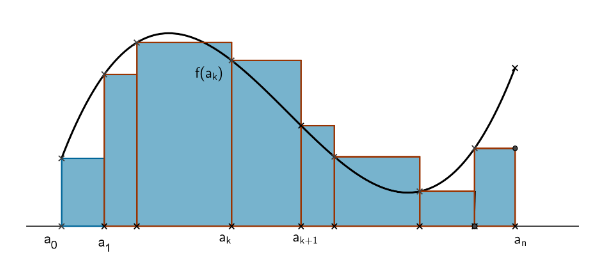

L’intervalle de l’intégrale est noté [a,b] et la fonction à intégrer f. On divise cet intervalle en n petits segments et on fait la somme des aires des petits rectangles délimités par l’axe des abscisses et la courbe de la fonction f.

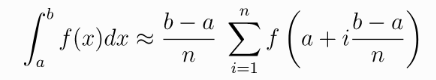

1. Ecrire la fontion integrale(f,a,b,n) 
2. Quelle valeur de n faut-il choisir pour être précis à 10^{-4} près ? Ecrire la fonction qui permette de calculer cette valeur.
3. Tester avec la fonction $f(x)=3x^3+2x-1$ sur l'interval [0,10] avec un pas de 0.001
4. Tester avec la fonction $g(x)=cos(\frac {1}{x})$ sur l'interval [-1;1] privé de 0

In [ ]:
#Exercice 1

import numpy as np
import math

#1

 def integrale(f, a, b, n):
    integrale = 0
    k=a;
    while(k < b):
        largeur = (b-a)/n
        hauteur = f(a + k*(b-a)/n)
        aire = largeur * hauteur
        integrale += aire
        k+=n
 
    return integrale

#Exo 2
def integrale_prec(f, a, b, n0, precision):
    val = integrale(f, a, b, n0)
    val0 = None
    while val0 is None or abs(val - val0) / val0 > precision:
        val0 = val
        n0 += 1
        val = integrale(f, a, b, n0)
    return val, n0

integrale_prec(lambda x: x, 0.1, 1, 10, 1e-4)

#Exo 3
f = lambda x : 3*x**3 + 2*x - 1
print(integrale(f,0,10,0.001))

#Exo 4
import math
g = lambda x : math.cos(1/x)
print(integrale(g,0.1,10,0.001))

Ex2: Méthode des trapèzes
Le calcul numérique d’une intégrale par la méthode des trapèzes consiste à calculer une valeur approchée de l’intégrale $\int_{a}^{b}f(x)dx$ en utilisant une interpolation linéaire de f par intervalles. Sur un intervalle [a,b], la valeur de l’intégrale peut être approchée par la surface du trapèzepassant par les points[a,0],[a,f(a)],[b,f(b)],[b,0]:
$$\int_{a}^{b}f(x)dx \approx (b-a) \left [ \frac{f(a)+f(b)}{2} \right ]$$

Pour calculer une meilleur approximation de cette intégrale, on découpe l’intervalle [a,b] en n intervalles plus petits, de taille $\frac{b-a}{n}$, et on calcule la somme des aires (signées) des trapèzes :
$$
\int_{a}^{b}f(x)dx \approx \frac{(b-a)}{2n} \sum_{k=i}^{n} \left [ f(a+(k-i)\frac{b-a}{n})+f(a+k\frac{b-a}{n}) \right ]$$

1. Écrivez tous les termes de la somme ci-dessus pourn= 3, et observez qu’il estpossible de faire le calcul avec exactement n+ 1 = 4appels à la fonction f
2. Écrire une fonction pythonintegrale_trapezes(a, b, n) qui calcule l’intégrale de la fonction f(x) de a à b avec n intervalles, en faisant au plus n+ 1 appels à la fonction f.
3. Pour $f(x) =xsin(x2)$, calculez l’erreur numérique de son intégrale sur l’intervalle [0,√π], pour 2 à 30 intervalles.

In [1]:
#Exercice 2

import numpy as np
import math

def trapezes(f, a, b, N):
     pas = (b-a) / N
     x = a
     somme = (f(a) + f(b)) / 2
    
     for _ in range(N-1):
        x += pas
        somme += f(x)
     return somme / N
    
trapezes(lambda x: x**2, 0, 1, 100)

0.3333500000000004